## Praca domowa 4

#### Autor: Zuzanna Glinka

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

In [152]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df1 = df.loc[(df.Year >= 2015) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales)]
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [9]:
df2 = df.loc[df.Year == 2010].groupby("Genre")[["Global_Sales","Genre"]].agg("sum")
df2[df2.Global_Sales == df2.Global_Sales.max()].reset_index()

,Genre,Global_Sales
0,Action,117.64


c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [10]:
df4 = df.groupby("Genre")[["EU_Sales", "JP_Sales"]].agg("mean")
df4

,EU_Sales,JP_Sales
Genre,,
Action,0.158868,0.048800
Adventure,0.050031,0.040808
Fighting,0.119617,0.104246
Misc,0.125605,0.063268
Platform,0.229314,0.149314
Puzzle,0.088632,0.099439
Racing,0.192906,0.046212
Role-Playing,0.127599,0.238293
Shooter,0.242161,0.029782


In [11]:
df5 = df4.loc[df4.JP_Sales > df4.EU_Sales]
df5


,EU_Sales,JP_Sales
Genre,,
Puzzle,0.088632,0.099439
Role-Playing,0.127599,0.238293
Strategy,0.066925,0.073284


In [12]:
df5.reset_index().rename(columns = {"Genre":"Typ Gry","JP_Sales":"Średnia sprzedaż w Japonii"} )[["Typ Gry","Średnia sprzedaż w Japonii"]].sort_values("Średnia sprzedaż w Japonii").reset_index(drop = True)

,Typ Gry,Średnia sprzedaż w Japonii
0,Strategy,0.073284
1,Puzzle,0.099439
2,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

## Wykres poprawiany
Zaktualizowalam dane dlatego nie pokrywają się one z wykresem w ggplot2

Źródło: https://koronawirusunas.pl
![](zly-wykres-hw4.png)

Wykres niepoprawny do poprzedniej pracy domowej
![](zly_wykres.png)

Wykres poprawiony w poprzedniej pracy domowej
![](dobry_wykres_ggplot.png)

In [189]:
covid = pd.read_csv("/Users/zuzannaglinka/Documents/hw4_twd/dane_hw4_2.csv",delimiter = ";").dropna().reset_index(drop = True)

In [128]:
covid

,wojewodztwo,liczba_mieszkancow_woj,liczba_zakazenych,wspolczynnik
0,mazowieckie,"5 349 114,00","508 669,00","10,52"
1,śląskie,"4 570 849,00","407 796,00","11,21"
2,wielkopolskie,"3 475 323,00","321 216,00","10,82"
3,małopolskie,"3 372 618,00","258 867,00","13,03"
4,dolnośląskie,"2 904 207,00","246 154,00","11,80"
5,pomorskie,"2 307 710,00","220 886,00","10,45"
6,łódźkie,"2 493 603,00","212 304,00","11,75"
7,kujawsko-pomorskie,"2 086 210,00","205 331,00","10,16"
8,lubelskie,"2 139 726,00","187 858,00","11,39"
9,zachodniopomorskie,"1 710 482,00","158 442,00","10,80"


In [129]:
mapa_woj = gpd.read_file('/Users/zuzannaglinka/Downloads/Wojewodztwa/WojewĘdztwa.shp')

In [131]:
mapa_woj['wspolczynnik']=covid['wspolczynnik']

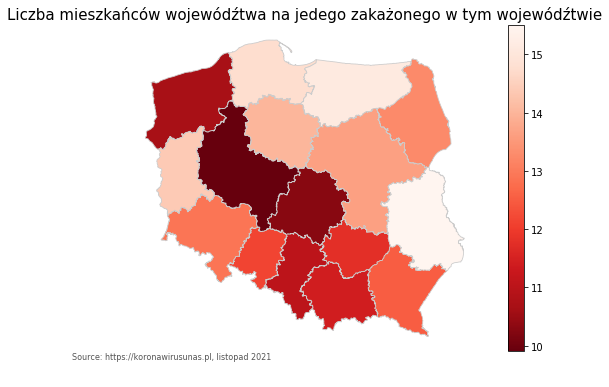

In [188]:
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 15.5, 11
mapa_woj.plot(column = 'wspolczynnik', cmap = sns.color_palette("Reds_r", as_cmap=True), 
              linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Liczba mieszkańców wojewódźtwa na jedego zakażonego w tym wojewódźtwie',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Source: https://koronawirusunas.pl, listopad 2021',xy=(0.1, .08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=8, color='#555555')
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("Reds_r", as_cmap=True), 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig(‘twd_hw4.png’, dpi=300)

Wykres jest poprawioną wersją wykresu z ggplot2 jednak zawiera inne dane - aktualniejsze

Ten wykres jest lepszy, gdyż nie ma siatki z tyłu, która nie dawała żadnej dodatkowej informacji.
Legenda poprawiłam na gradiendową, ponieważ wykorzystuję dość sporą liczbę kolorów i dzięki temu jest czytelniejsza.
Również odwróciłam legendę, gdyż w takiej kolejności wydaje sie czytelniejsza.